### Project Name - Rossman Retail Sales Forecasting

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

import sys
import os

sys.path.append(os.path.abspath('../')) 

from scripts.data.data_handling import *


# Loading Dataset

In [2]:
# Paths to the datasets
train_data_path = 'D:/Kifiya AI/rossman-sales-forecasting/data/train.csv'
test_data_path = 'D:/Kifiya AI/rossman-sales-forecasting/data/test.csv'
store_data_path = 'D:/Kifiya AI/rossman-sales-forecasting/data/store.csv'

try:
    train_data = load_dataset(train_data_path)
    test_data = load_dataset(test_data_path)
    store_data = load_dataset(store_data_path)

except Exception as e:
    print(f"Error loading datasets: {e}")


2024-09-20 19:11:48,278 - DataLoader - INFO - Attempting to load dataset from D:/Kifiya AI/rossman-sales-forecasting/data/train.csv
2024-09-20 19:11:50,176 - DataLoader - INFO - Successfully loaded dataset with 1017209 rows and 9 columns.
2024-09-20 19:11:50,176 - DataLoader - INFO - Attempting to load dataset from D:/Kifiya AI/rossman-sales-forecasting/data/test.csv
2024-09-20 19:11:50,287 - DataLoader - INFO - Successfully loaded dataset with 41088 rows and 8 columns.
2024-09-20 19:11:50,287 - DataLoader - INFO - Attempting to load dataset from D:/Kifiya AI/rossman-sales-forecasting/data/store.csv
2024-09-20 19:11:50,309 - DataLoader - INFO - Successfully loaded dataset with 1115 rows and 10 columns.


Dtaset view

In [3]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Rows and Col count

In [6]:
print(f'Shape of train dataset is :{train_data.shape}')
print(f'Dataset contains {train_data.index.value_counts().sum()} Rows')
print(f'Dataset contains {train_data.columns.value_counts().sum()} Columns')


Shape of train dataset is :(1017209, 9)
Dataset contains 1017209 Rows
Dataset contains 9 Columns


In [7]:
print(f'Shape of Store dataset is :{store_data.shape}')
print(f'Dataset contains {store_data.index.value_counts().sum()} Rows')
print(f'Dataset contains {store_data.columns.value_counts().sum()} Columns')


Shape of Store dataset is :(1115, 10)
Dataset contains 1115 Rows
Dataset contains 10 Columns


Dataset Information

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Duplicate Values

In [10]:
train_data.duplicated().any()

False

In [11]:
store_data.duplicated().any()

False

Null Values

In [12]:
train_data.isnull().sum().sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store_data.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

In [14]:
print('Percentage Null Value')
print(round(store_data.isnull().sum().sort_values(ascending=False)*100/len(store_data),2))
     

Percentage Null Value
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
CompetitionDistance           0.27
Store                         0.00
StoreType                     0.00
Assortment                    0.00
Promo2                        0.00
dtype: float64


In [15]:
#describe the dataset
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
train_data.describe(percentiles=percentiles)


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209,1017209,1017209,1017209,1017209,1017209,1017209
mean,558,4,5774,633,1,0,0
std,322,2,3850,464,0,0,0
min,1,1,0,0,0,0,0
1%,11,1,0,0,0,0,0
25%,280,2,3727,405,1,0,0
50%,558,4,5744,609,1,0,0
75%,838,6,7856,837,1,1,0
95%,1060,7,12137,1362,1,1,1
99%,1104,7,17160,2267,1,1,1


Sales and customers columns contain outliers

In [16]:
store_data.describe(percentiles=percentiles)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115,1112,761,761,1115,571,571
mean,558,5405,7,2009,1,24,2012
std,322,7663,3,6,1,14,2
min,1,20,1,1900,0,1,2009
1%,12,50,1,1994,0,1,2009
25%,280,718,4,2006,0,13,2011
50%,558,2325,8,2010,1,22,2012
75%,836,6882,10,2013,1,37,2013
95%,1059,20145,12,2014,1,45,2014
99%,1104,35145,12,2015,1,48,2015


Visualizing the missing values

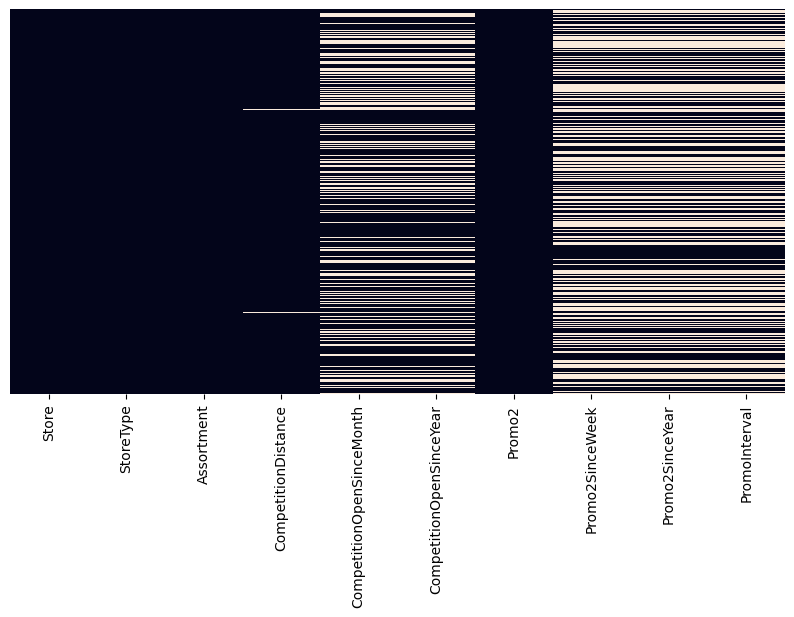

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(store_data.isnull(),cbar=False,yticklabels=False)
plt.show()

## Preprocessing

Since there are only 3 missing values from CompetitionDistance, we fill with the average from the column

In [18]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace = True)

The rows that do not have any Promo2 we can fill the rest of the values with 0

In [19]:
store_data.fillna(0, inplace = True)

In [20]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,0,0,0
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,0,0,0
4,5,a,a,29910,4,2015,0,0,0,0


Merging both the dataset

In [21]:
data=train_data.merge(store_data,on='Store',how='left')


In [22]:
#first look of the merged dataset
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0


In [23]:
#shape of dataset
data.shape

(1017209, 18)

In [24]:
# year,month,week_num column from Date Column
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['week_num'] = data['Date'].dt.isocalendar().week

In [25]:
#dropping date column from data
data.drop(columns='Date',axis=1,inplace=True)

## Outlier Detaction and Treatment

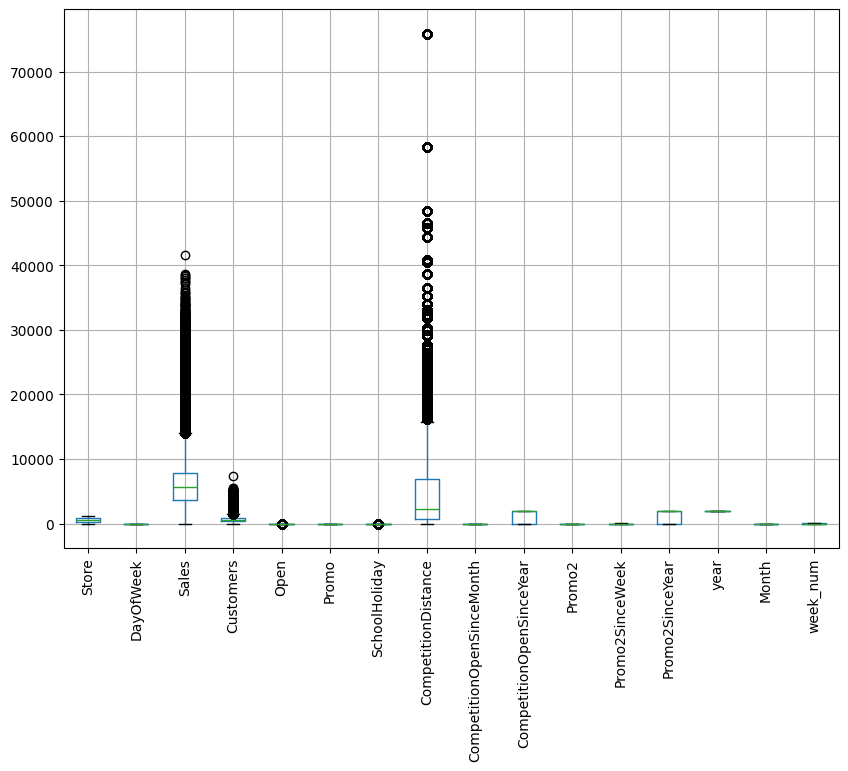

In [26]:
plt.figure(figsize=(10,7))
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()


In [27]:
#first create copy of dataset
df=data.copy()

In [28]:
#shape before outlier treatment
df.shape

(1017209, 20)

Treating Outliers

Removing outliers in Sales and Customers using Z-Score method since they have high effect on the prediction

In [29]:
remove_outliers_zscore(df, column='Sales')
remove_outliers_zscore(df, column='Customers')

2024-09-20 19:12:19,337 - DataLoader - INFO - Removed 9731 outliers from Sales using Z-score method.
2024-09-20 19:12:19,653 - DataLoader - INFO - Removed 10501 outliers from Customers using Z-score method.


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,Month,week_num
0,1,5,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,a,a,1900,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,0,0,0,0,a,1,c,c,1880,4,2006,0,0,0,0,2013,1,1
1017206,1113,2,0,0,0,0,a,1,a,c,9260,0,0,0,0,0,0,2013,1,1
1017207,1114,2,0,0,0,0,a,1,a,c,870,0,0,0,0,0,0,2013,1,1


In [30]:
#find out 90,95,99 percentile values of Competition distance column
percentiles=[0.90,0.95,0.99]
data['CompetitionDistance'].describe(percentiles=percentiles)

count   1017209
mean       5430
std        7705
min          20
50%        2330
90%       15710
95%       20390
99%       36410
max       75860
Name: CompetitionDistance, dtype: float64

competitionDistance hase huge number of outliers so replaced them with percentiles values using capping method

In [32]:
cap_outliers(df, column='CompetitionDistance')


2024-09-20 19:12:19,963 - DataLoader - INFO - Capped outliers in CompetitionDistance between 50.0 and 36410.0.


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,Month,week_num
0,1,5,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620,9,2009,0,0,0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910,4,2015,0,0,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,a,a,1900,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,0,0,0,0,a,1,c,c,1880,4,2006,0,0,0,0,2013,1,1
1017206,1113,2,0,0,0,0,a,1,a,c,9260,0,0,0,0,0,0,2013,1,1
1017207,1114,2,0,0,0,0,a,1,a,c,870,0,0,0,0,0,0,2013,1,1


In [33]:
#shape of the data after the outlier treatment
df.shape

(996977, 20)